In [7]:
import pypdns
import json
import getpass

# Securely collect PassiveDNS credentials
print("Setting up PassiveDNS API authentication...")
PASSIVE_DNS_USER = getpass.getpass("Enter your PassiveDNS Username: ")
PASSIVE_DNS_KEY = getpass.getpass("Enter your PassiveDNS API Key: ")

# Create PassiveDNS client with authentication
pdns = pypdns.PyPDNS(basic_auth=(PASSIVE_DNS_USER, PASSIVE_DNS_KEY))

print("Authentication configured successfully!")
print("Ready to query PassiveDNS database.")

Setting up PassiveDNS API authentication...


Enter your PassiveDNS Username:  ········
Enter your PassiveDNS API Key:  ········


Authentication configured successfully!
Ready to query PassiveDNS database.


Resolved IP addresses for circl.lu:
185.194.93.14
2a00:5980:93::14

Performing reverse DNS lookup for IP: 185.194.93.14

Found domains for 185.194.93.14:
antibot.lu
attack-community.org
circl.lu
cpab.circl.lu
d4-project.org
open-source-security-software.net
x-isac.org


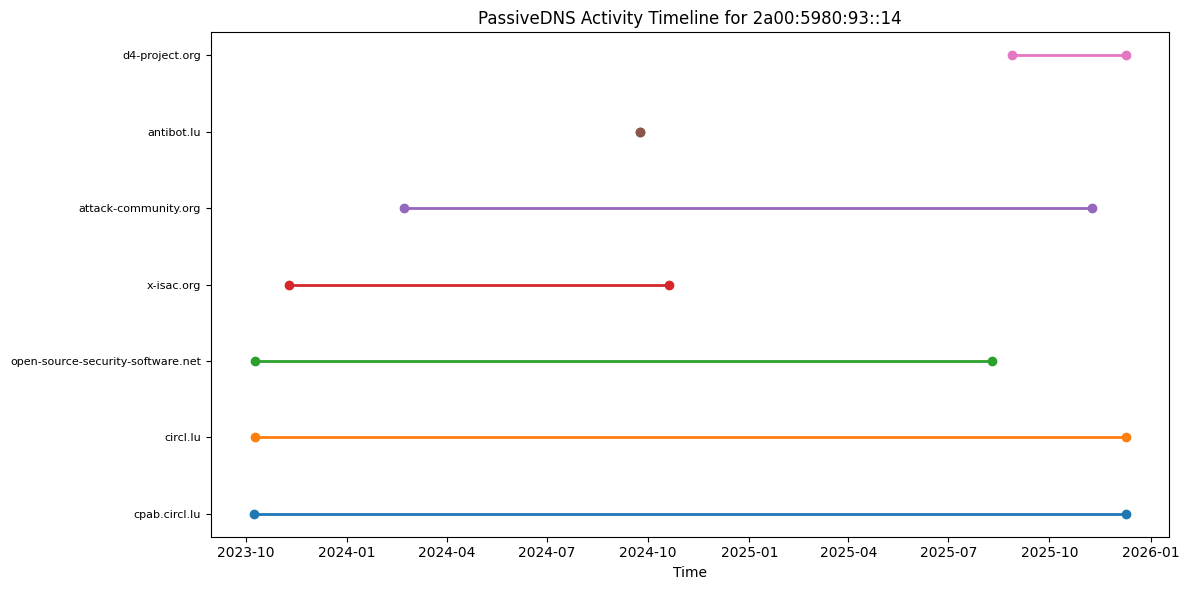

In [16]:
from numpy import record

domain = "circl.lu"
ips = set()

try:
    a_records = list(pdns.iter_query(q=domain, filter_rrtype='A'))
    aaaa_records = list(pdns.iter_query(q=domain, filter_rrtype='AAAA'))

    ips = {record.rrname for record in a_records + aaaa_records}

    print(f"Resolved IP addresses for {domain}:")
    for ip in sorted(ips):
        print(ip)

    ip_address = '185.194.93.14'
    print(f"\nPerforming reverse DNS lookup for IP: {ip_address} ...")
    records = list(pdns.iter_query(q=ip_address))
    
    if records:
        domains = set()
        
        for i, record in enumerate(records, 1):
            if hasattr(record, 'rdata'):
                domains.add(record.rdata)
        
        print(f"\nFound domains for {ip_address}:")
        for domain in sorted(domains):
            print(domain)


    # plot timeline
    import pandas as pd
    import matplotlib.pyplot as plt
    
    records = pdns.iter_query(q=ip_address)
    df = pd.DataFrame([r.record for r in records])
    
    df["time_first_dt"] = pd.to_datetime(df["time_first"], unit="s")
    df["time_last_dt"]  = pd.to_datetime(df["time_last"], unit="s")
    
    # Optional: Keep only unique rrname/rdata pairs
    df = df.drop_duplicates(subset=["rrname", "rdata"])
    
    # Sort and index
    df = df.sort_values("time_first_dt").reset_index(drop=True)
    
    # Plot timeline
    plt.figure(figsize=(12, 6))
    
    for i, row in df.iterrows():
        plt.plot([row["time_first_dt"], row["time_last_dt"]], [i, i], 'o-', lw=2)
        
    # Label each Y tick with rrname or rdata
    plt.yticks(range(len(df)), df["rdata"], fontsize=8)
    plt.xlabel("Time")
    plt.title(f"PassiveDNS Activity Timeline for {ip}")
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred while querying PassiveDNS: {e}")

* How many unique IPs serve the domain?
    * 2, one IPv4 and one IPv6 
* Is IPv6 supported?
    * Yes 
* Does the reverse lookup suggest shared hosting or a single-tenant IP?
    * Yes, there are 7 other domains hosted on those IPs. 
